# Анализ зарплат за 2000 - 2023 годы

Мы будем рассамтривать зарплаты в следующих отраслях:
- Производство одежды
- Образование
- Деятельности в области ин=формации и связи

In [1]:
import pandas as pd

In [2]:
!pip install openpyxl


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip


In [3]:
salaries_new = pd.read_excel("tab3_zpl_2023.xlsx", index_col = 0, sheet_name = 0, header = 4)
salaries_old = pd.read_excel("tab3_zpl_2023.xlsx", index_col = 0, sheet_name = 1, header = 2)

## Отбор нужных данных

In [4]:
salaries_new_sel = salaries_new.iloc[[17, 43, 50]]
salaries_old_sel = salaries_old.iloc[[10, 28, 32]]
salaries_new_sel = salaries_new_sel.rename(index = {"    производство одежды": "Одежда", "деятельность в области информации и связи": "Связь", "образование": "Образование"})
salaries_old_sel = salaries_old_sel.rename(index = {"  текстильное и швейное производство": "Одежда", "     из них связь": "Связь", "Образование": "Образование"})

In [5]:
display(salaries_new_sel)

,2017,2018,2019,2020,2021,2022,2023
Одежда,20298.5,19819.0,21065.4,20927.0,24311.7,27351.7,34199.3
Связь,58811.2,66590.0,75898.2,85648.0,97434.4,121262.4,136987.5
Образование,30257.6,34361.0,37071.9,39563.0,43390.5,48400.2,54314.8


In [6]:
display(salaries_old_sel)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Одежда,1214.8,1764.8,2241.7,2803.0,3356.5,3986.0,4964.3,6589.5,8453.6,9020.5,10302.1,11004.4,12095.4,13488.5,14453.0,15758.0,17065.0
Связь,2879.2,4131.2,5661.5,7304.2,8974.2,11389.1,13220.3,16042.6,19918.1,20923.1,24275.0,26995.0,28700.9,31346.4,33705.0,34958.0,37984.0
Образование,1240.2,1833.0,2927.3,3386.6,4203.4,5429.7,6983.3,8778.3,11316.8,13293.6,14075.2,15809.1,18995.3,23457.9,25862.0,26928.0,28088.0


## График зарплат

<Axes: >

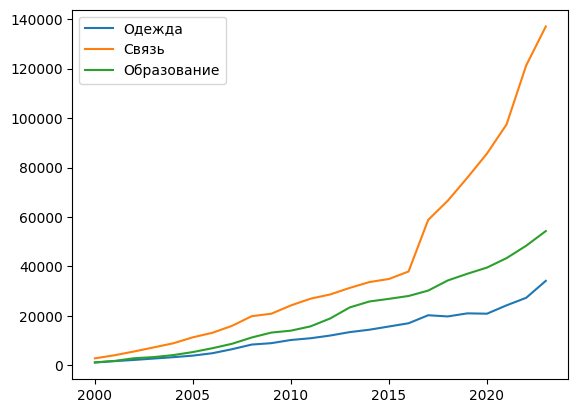

In [7]:
salaries = pd.concat([salaries_old_sel, salaries_new_sel], axis = 1).T
salaries.plot()

## Инфляция

In [8]:
!pip install lxml


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip


In [9]:
inflation = pd.read_html("Таблицы уровня инфляции.html", index_col = 0)
inflation_sel = pd.Series(inflation[0]["Всего"], index = inflation[0].index).iloc[1:25]
inflation_sel[2000] = 0
inflation_year = pd.DataFrame({"Год": 1 + inflation_sel / 100, "Инфляция": pd.NA})
inflation_year = inflation_year.loc[::-1]
inflation_year["Инфляция"][2000] = 100
inflation_year["Инфляция"] = inflation_year["Год"].cumprod()

/tmp/ipykernel_25331/1400531668.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  inflation_year["Инфляция"][2000] = 100


In [10]:
salaries_inflation = pd.concat([salaries, inflation_year], axis = 1)
salaries_inflation["Одежда (инфляция)"] = salaries_inflation["Одежда"] / salaries_inflation["Инфляция"]
salaries_inflation["Связь (инфляция)"] = salaries_inflation["Связь"] / salaries_inflation["Инфляция"]
salaries_inflation["Образование (инфляция)"] = salaries_inflation["Образование"] / salaries_inflation["Инфляция"]
display(salaries_inflation)

,Одежда,Связь,Образование,Год,Инфляция,Одежда (инфляция),Связь (инфляция),Образование (инфляция)
2000,1214.8,2879.2,1240.2,1.0000,1.000000,1214.800000,2879.200000,1240.200000
2001,1764.8,4131.2,1833.0,1.1858,1.185800,1488.277956,3483.892731,1545.791870
2002,2241.7,5661.5,2927.3,1.1506,1.364381,1643.015559,4149.499303,2145.514318
2003,2803.0,7304.2,3386.6,1.1199,1.527971,1834.459117,4780.326893,2216.403584
2004,3356.5,8974.2,4203.4,1.1174,1.707355,1965.906797,5256.201631,2461.937324
2005,3986.0,11389.1,5429.7,1.1091,1.893627,2104.955222,6014.436909,2867.354583
2006,4964.3,13220.3,6983.3,1.0900,2.064053,2405.121874,6405.018372,3383.294237
2007,6589.5,16042.6,8778.3,1.1187,2.309057,2853.762939,6947.686066,3801.682557
2008,8453.6,19918.1,11316.8,1.1328,2.615699,3231.870016,7614.828022,4326.491270
2009,9020.5,20923.1,13293.6,1.0880,2.845881,3169.668957,7352.064802,4671.172468


Вывод: за 23 года зарплата значительно выросла даже с учётом инфляции.
Быстрее всего растёт зарплата в сфере связи, медленее всего - в сфере производства одежды.

<Axes: >

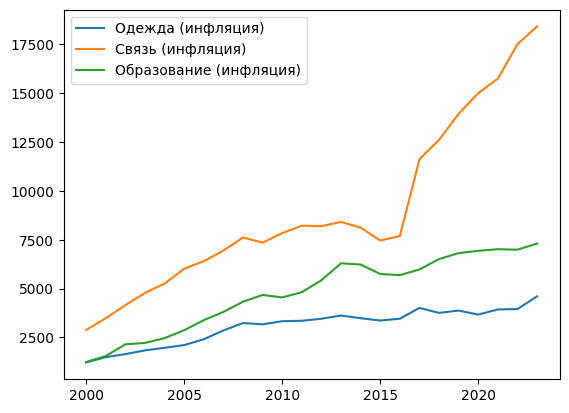

In [11]:
salaries_inflation[["Одежда (инфляция)", "Связь (инфляция)", "Образование (инфляция)"]].plot()